	Features
## 1	X_Minimum
## 2	X_Maximum
## 3	Y_Minimum
## 4	Y_Maximum
## 5	Pixels_Areas
## 6	X_Perimeter
## 7	Y_Perimeter
## 8	Sum_of_Lumisity
## 9	Maximum_of_Lumisity
## 10	Length_of_Conveyer
## 11	TypeOfSteel_A300
## 12	TypeOfSteel_A400
## 13	Steel_Plate_Thickness
## 14	Edges_Index
## 15	Empty_Index
## 16	Square_Index
## 17	Outside_X_Index
## 18	Edges_X_Index
## 19	Edges_Y_Index
## 20	Outside_Global_Index
## 21	LogOfAreas
## 22	Log_X_Index
## 23	Log_Y_Index
## 24	Orientation_Index
## 25	Lumisity_Index
## 26	SigmoidOfAreas
## 27	Minimum_of_Luminosity
## 28	Pastry
## 29	Z_Scratch
## 30	K_Scratch
## 31	Stains
## 32	Dirtiness
## 33	Bumps
## 34	Other_Faults


In [ ]:
!wget https://archive.ics.uci.edu/static/public/198/steel+plates+faults.zip

--2024-07-07 15:04:40--  https://archive.ics.uci.edu/static/public/198/steel+plates+faults.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘steel+plates+faults.zip.1’

steel+plates+faults     [ <=>                ]  98.53K  --.-KB/s    in 0.1s    

2024-07-07 15:04:40 (673 KB/s) - ‘steel+plates+faults.zip.1’ saved [100890]



In [ ]:
!unzip -q steel+plates+faults.zip

replace Faults.NNA? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Faults27x7_var? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
import pandas as pd
data = pd.read_table('Faults.NNA', header = None, sep='\t')

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
data.iloc[:,27:].describe()

,27,28,29,30,31,32,33
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# data['Target'] = data.apply(lambda x:
#                             "A" if x[27] == 1 else
#                             ("B" if x[28] == 1 else
#                              ("C" if x[29] == 1 else
#                               ("D" if x[30] == 1 else
#                                ("E" if x[31] == 1 else
#                                 ("F" if x[32] == 1 else
#                                 "G"))))), axis=1)


we can use 1000000 * [A,B,C,D,E,F,G] OR ARGMAX

In [ ]:
# import numpy as np
# data.iloc[:,27:].apply(lambda x: np.argmax(x), axis=1)

In [ ]:
pd.from_dummies(data.iloc[:,27:])

,
0,27
1,27
2,27
3,27
4,27
...,...
1936,33
1937,33
1938,33
1939,33


In [ ]:
data['target'] = pd.from_dummies(data.iloc[:,27:])-27

In [ ]:
data['target'].sample(6)

1095    5
324     1
687     2
1225    5
1778    6
989     5
Name: target, dtype: object

In [ ]:
data.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33, 'target'],
      dtype='object')

In [ ]:
# np.argmax([-3,0,1,3,2,1,-1,-2])

In [ ]:
data.drop(columns=[27,28,29,30,31,32,33], axis=1, inplace=True)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


In [ ]:
data.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26, 'target'],
      dtype='object')

In [ ]:
data.columns= ["X_Minimum",
"X_Maximum",
"Y_Minimum",
"Y_Maximum",
"Pixels_Areas",
"X_Perimeter",
"Y_Perimeter",
"Sum_of_Lumisity",
"Maximum_of_Lumisity",
"Length_of_Conveyer",
"TypeOfSteel_A300",
"TypeOfSteel_A400",
"Steel_Plate_Thickness",
"Edges_Index",
"Empty_Index",
"Square_Index",
"Outside_X_Index",
"Edges_X_Index",
"Edges_Y_Index",
"Outside_Global_Index",
"LogOfAreas",
"Log_X_Index",
"Log_Y_Index",
"Orientation_Index",
"Lumisity_Index",
"SigmoidOfAreas", "Minimum_of_Luminosity", "Target"]

In [ ]:
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Lumisity', 'Maximum_of_Lumisity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'Target'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
for i in data.columns:
  fig = px.histogram(data_frame=data, x=i, nbins=50, title=f"Histogram of {i}")
  fig.show()

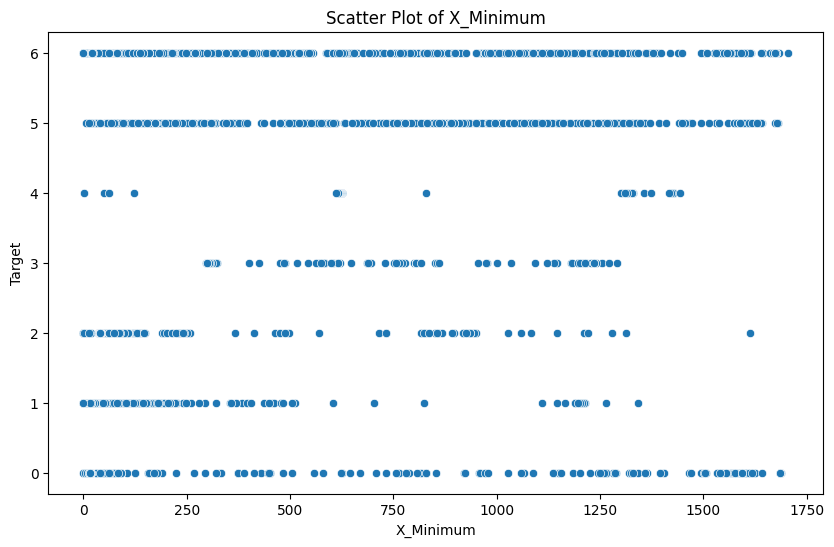

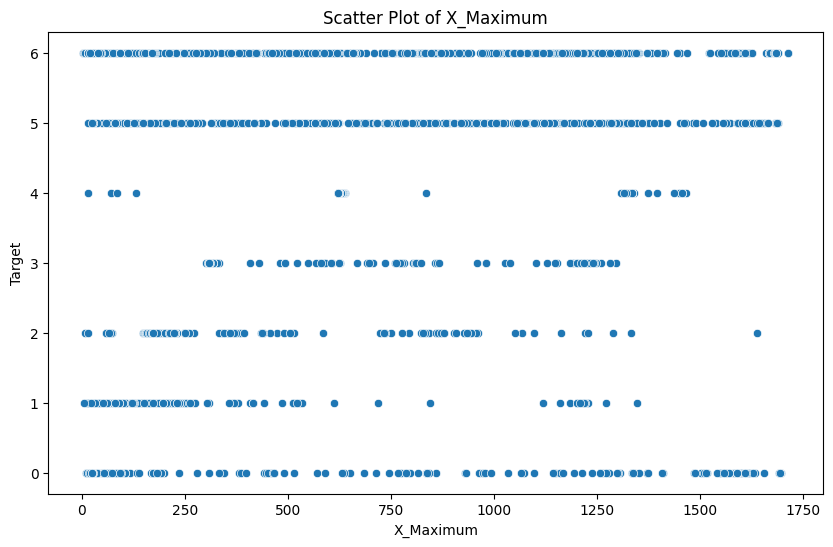

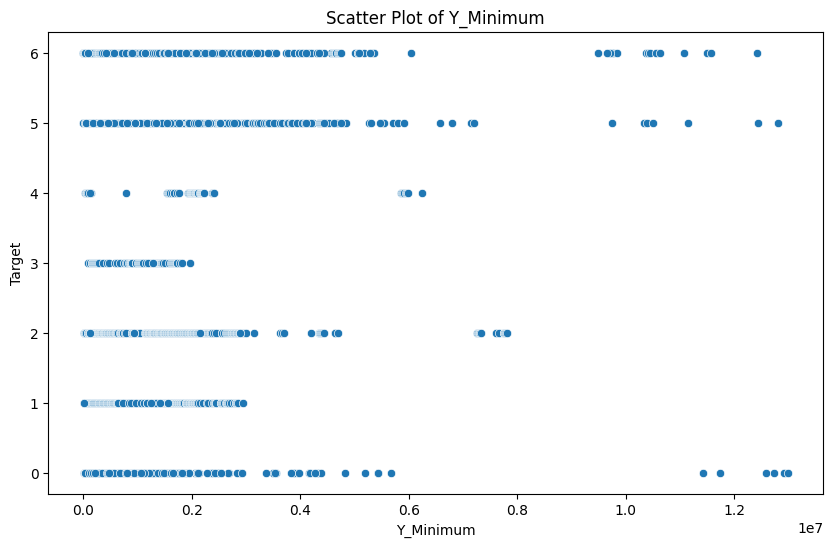

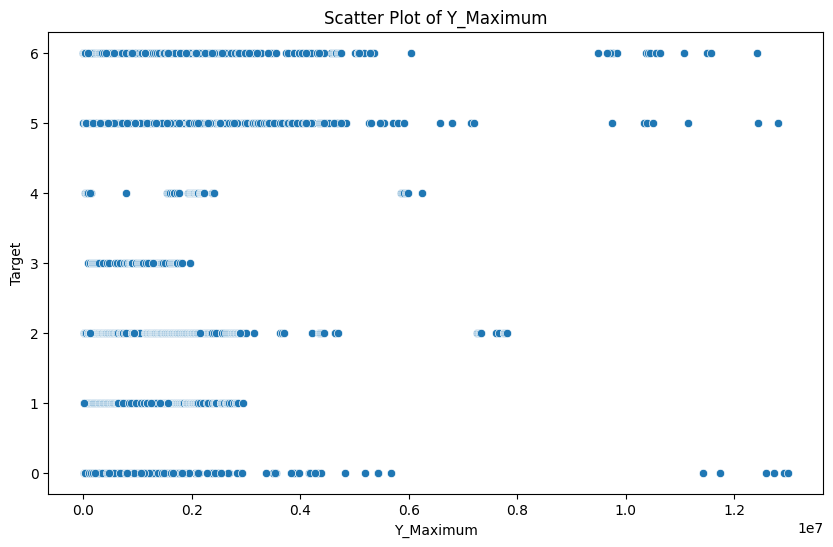

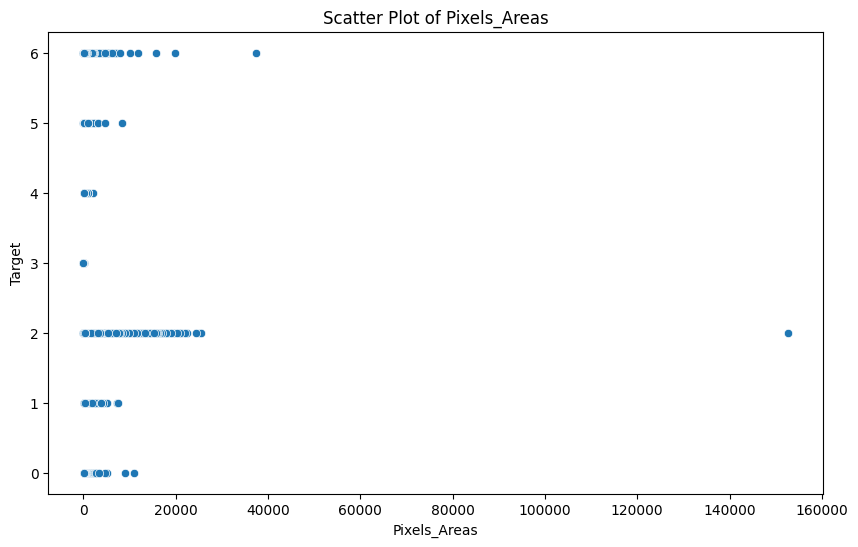

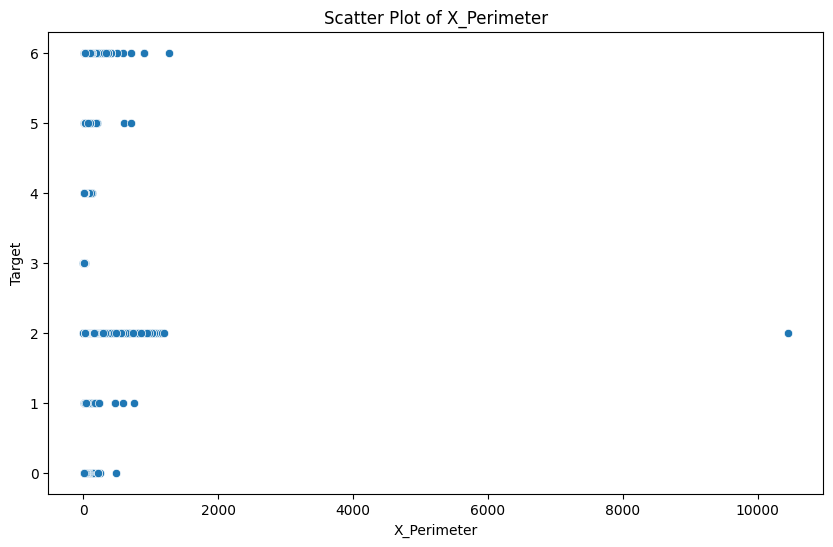

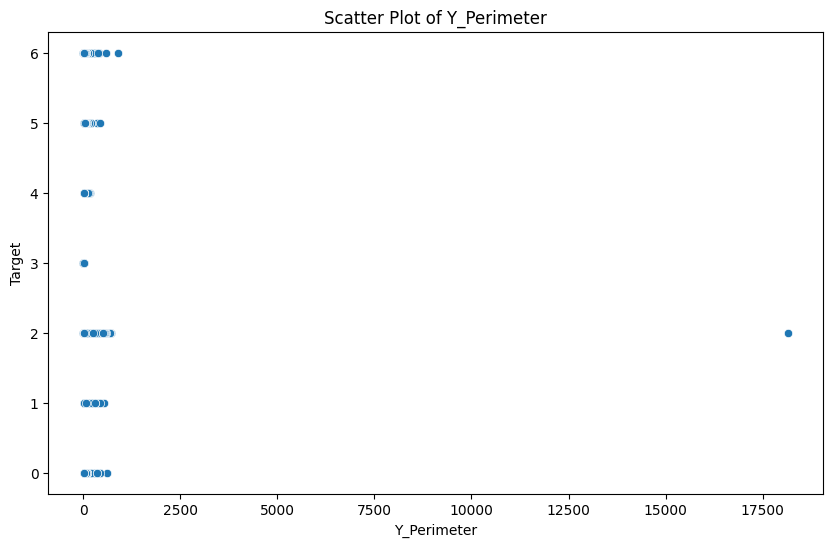

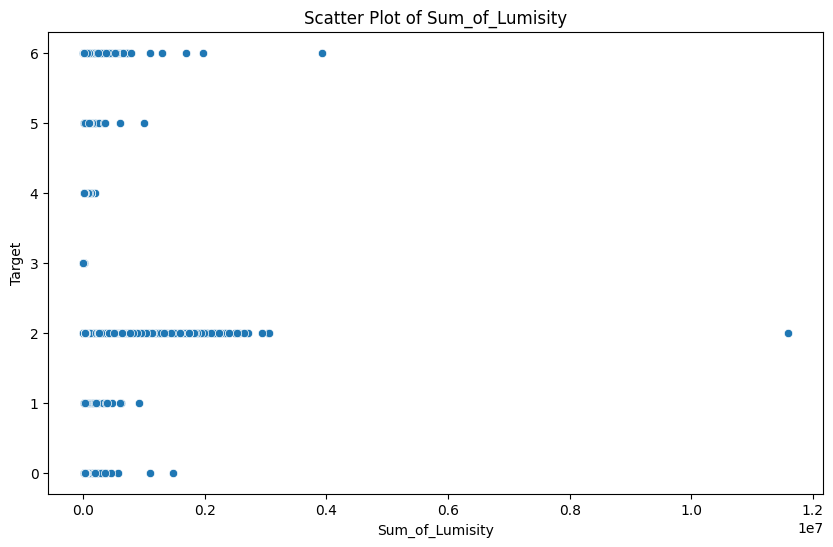

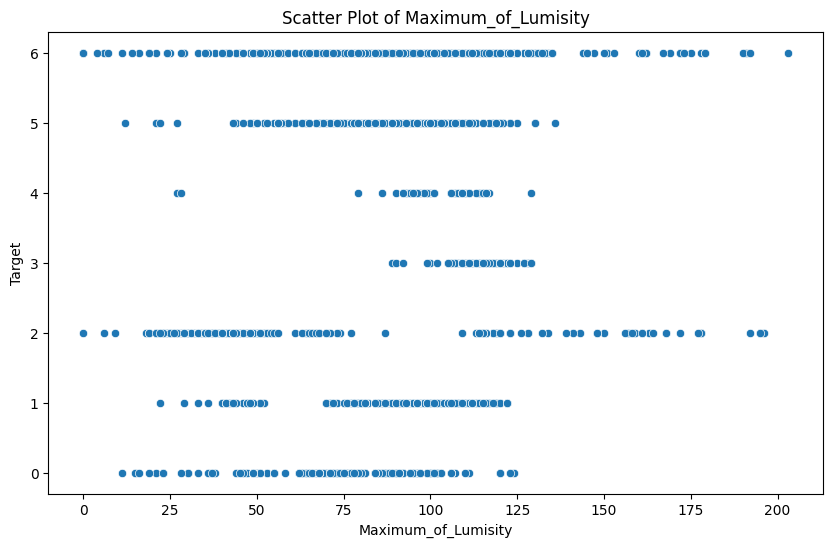

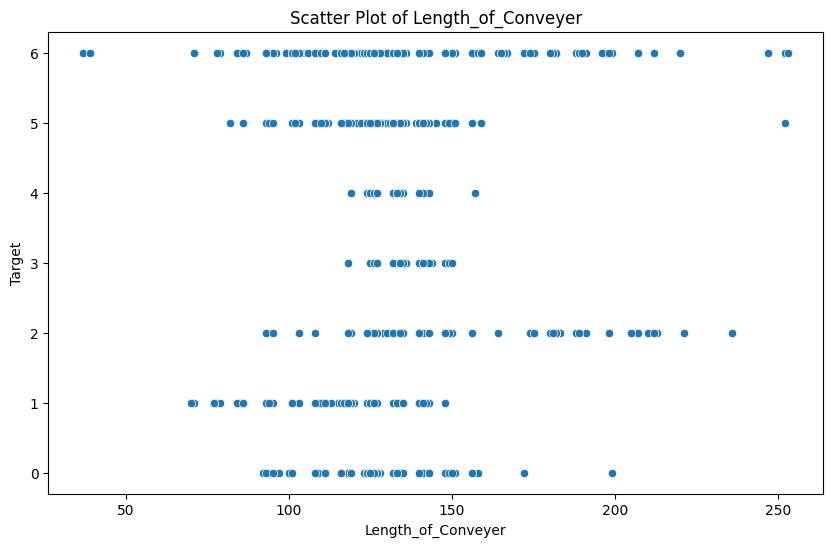

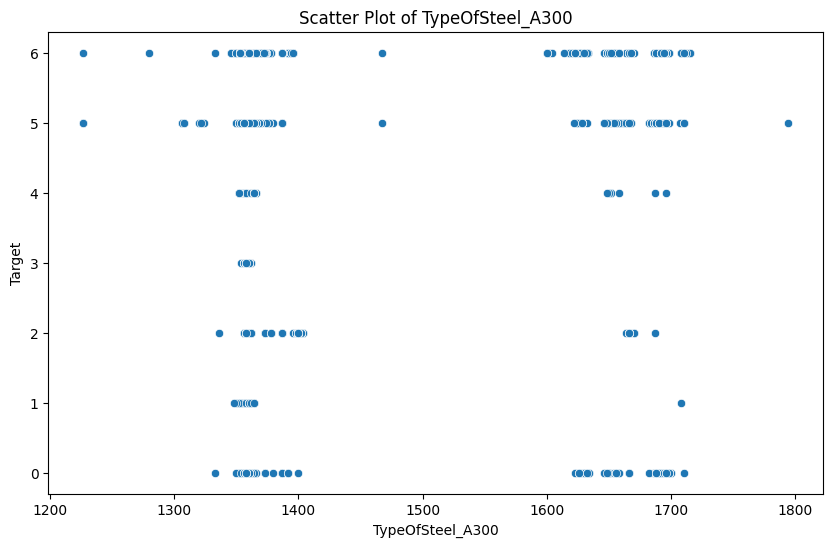

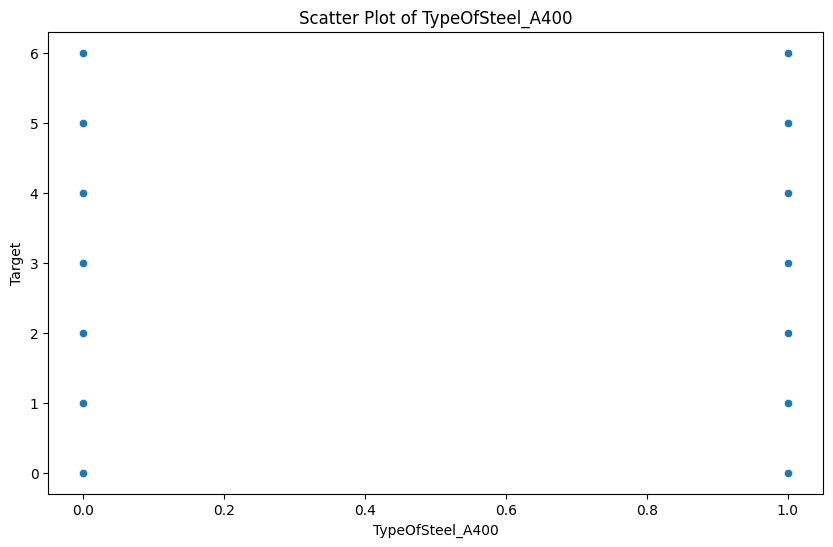

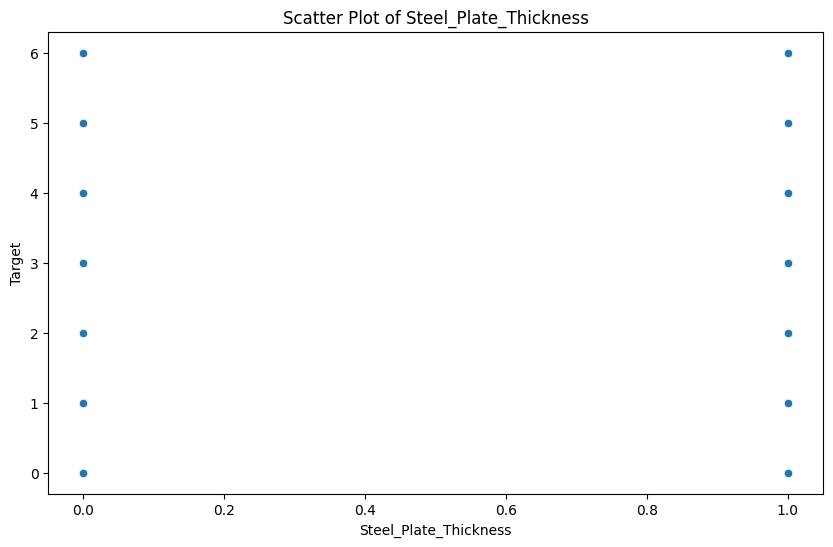

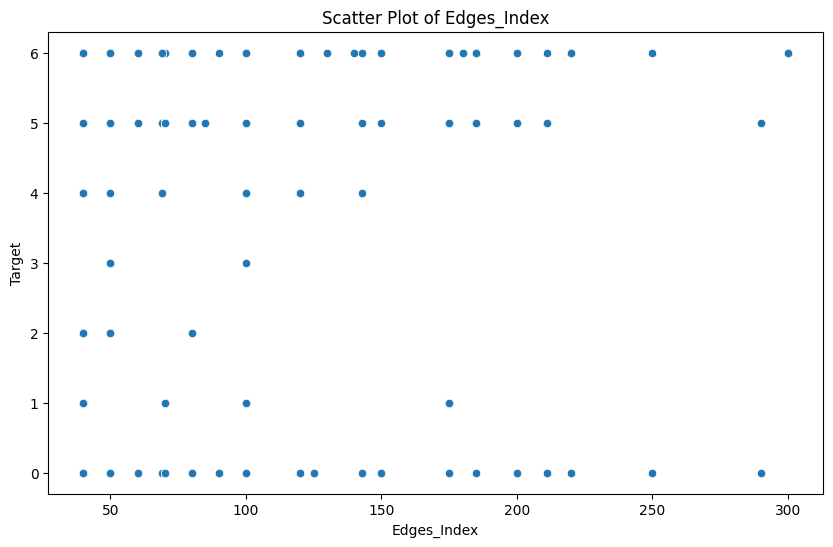

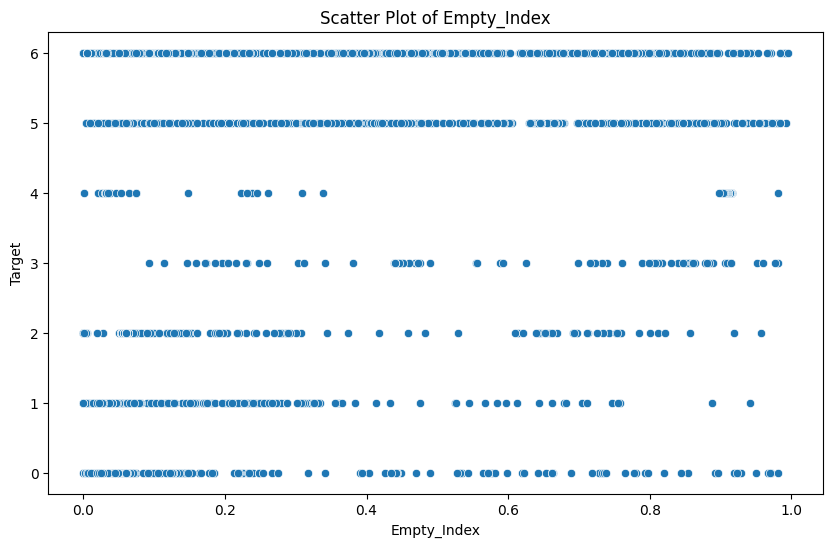

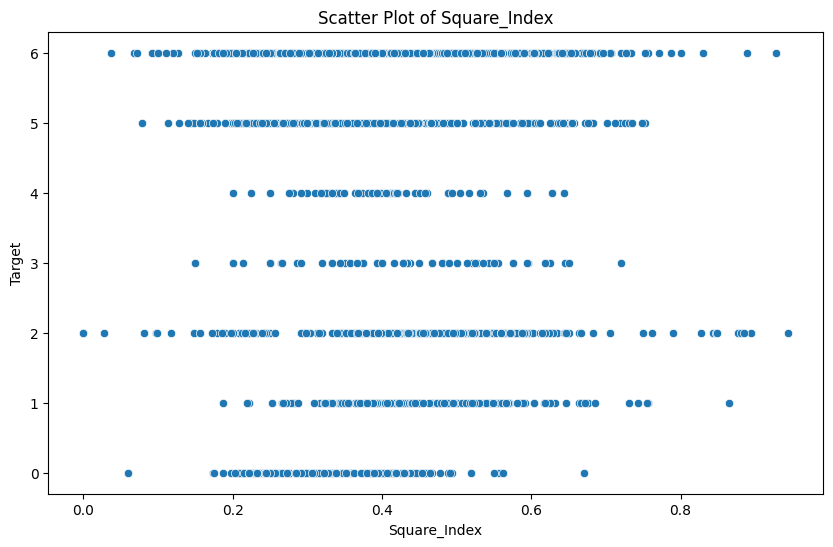

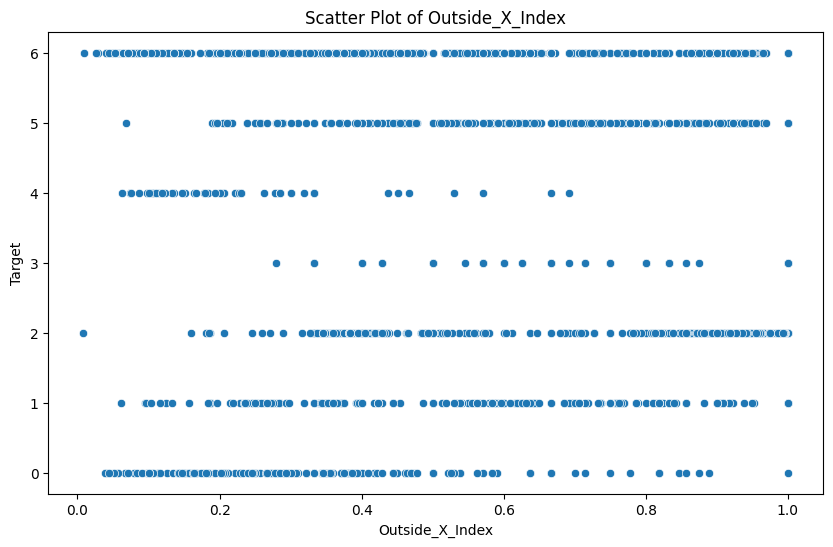

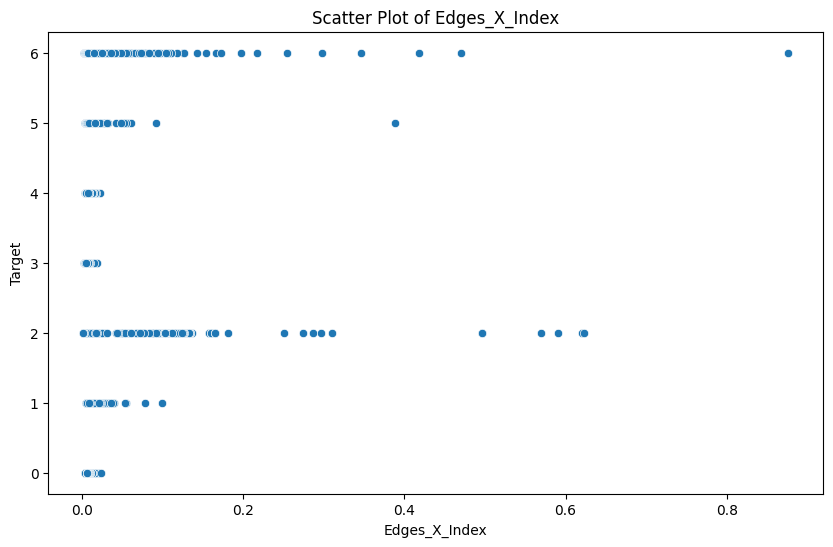

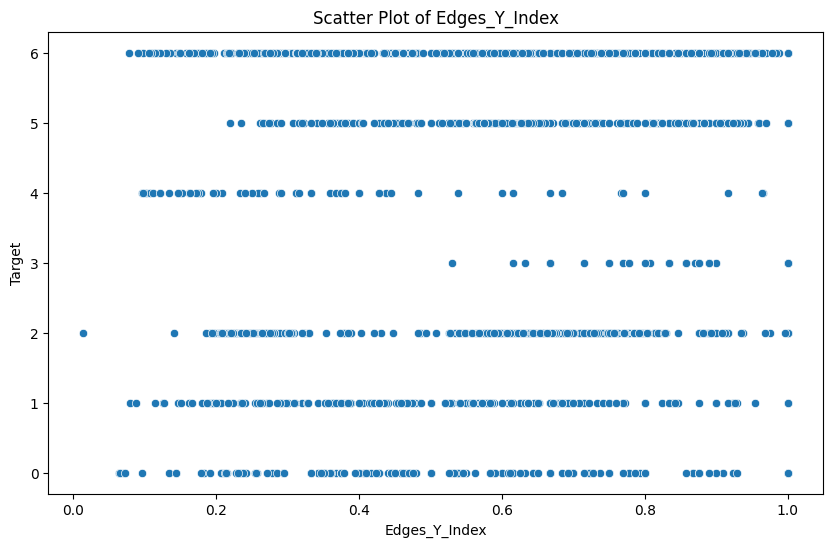

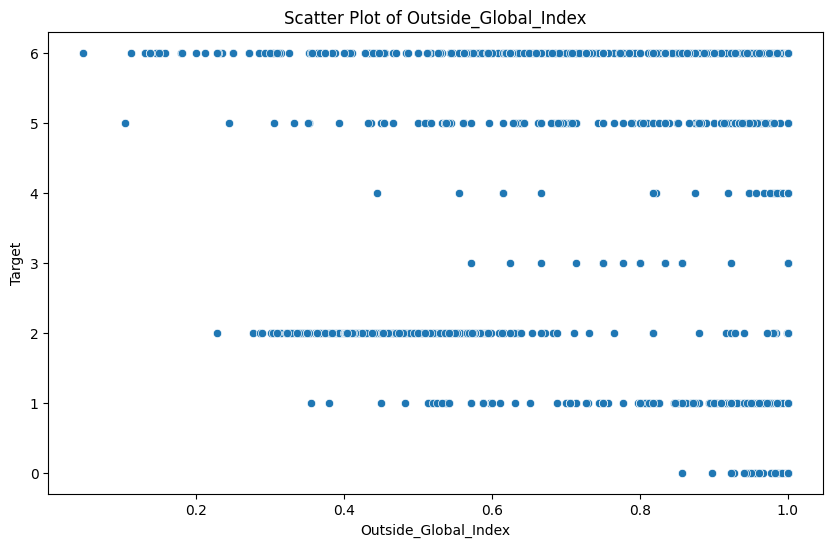

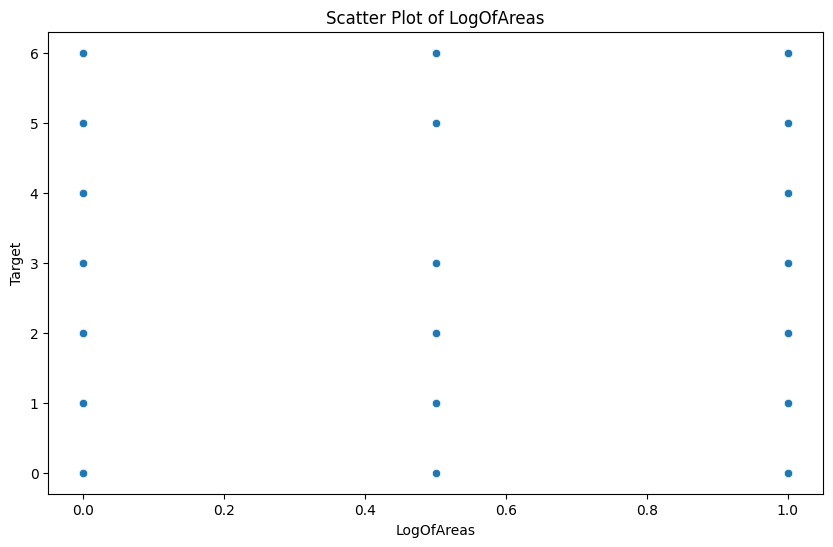

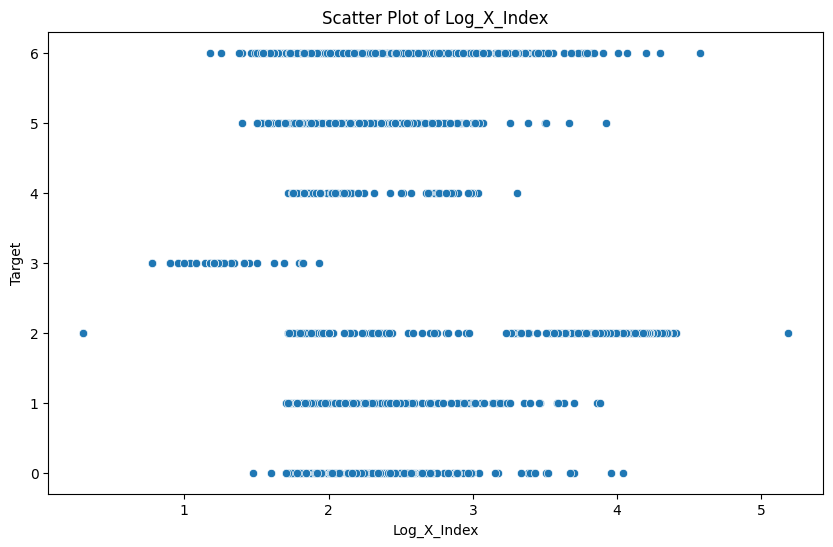

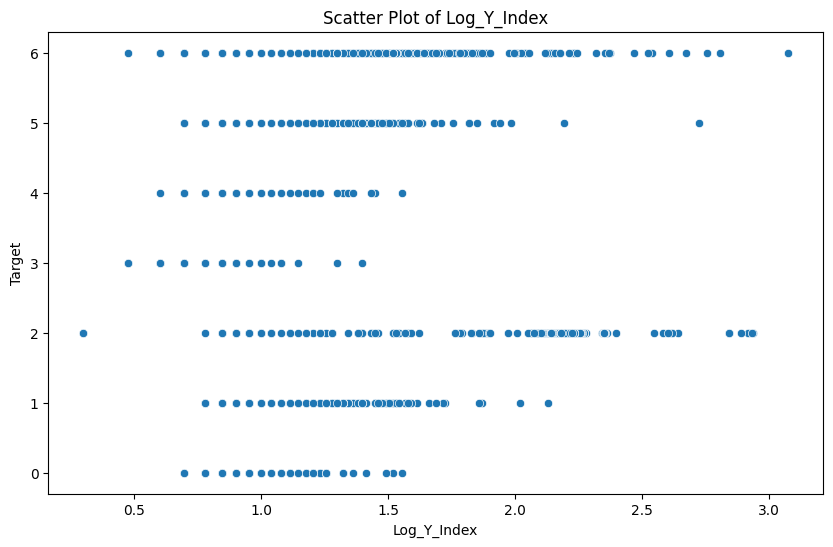

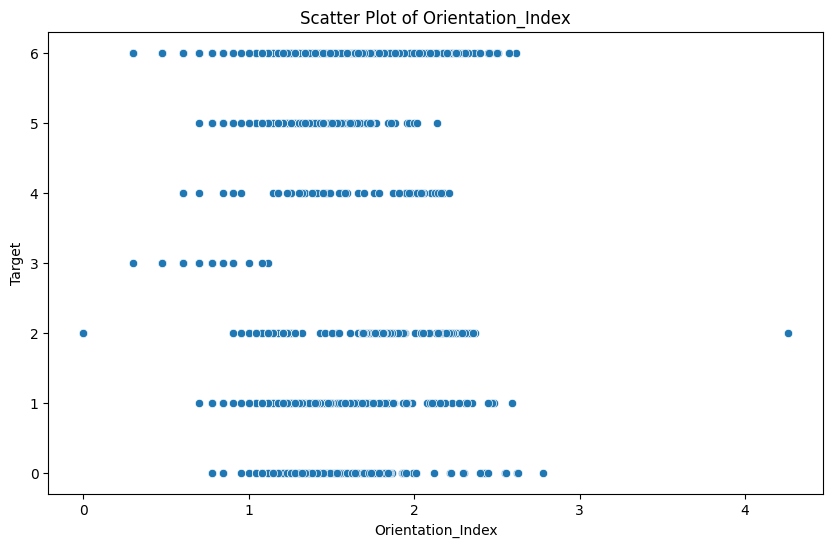

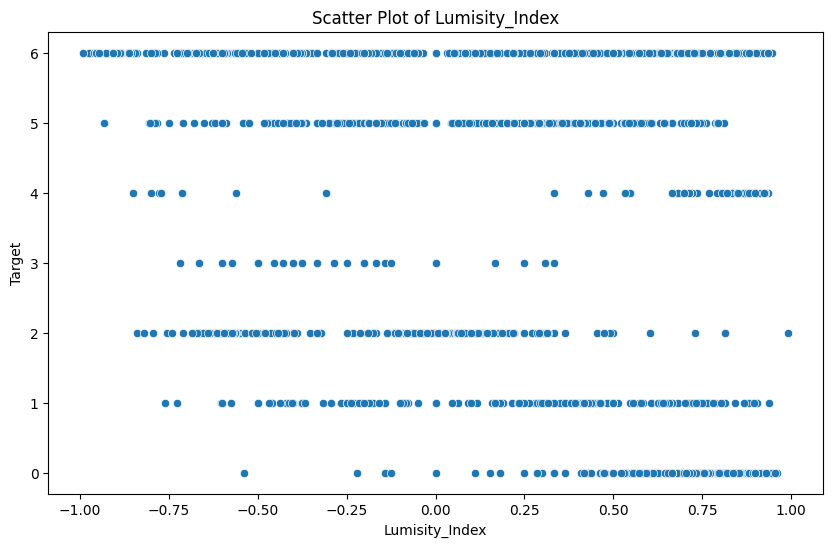

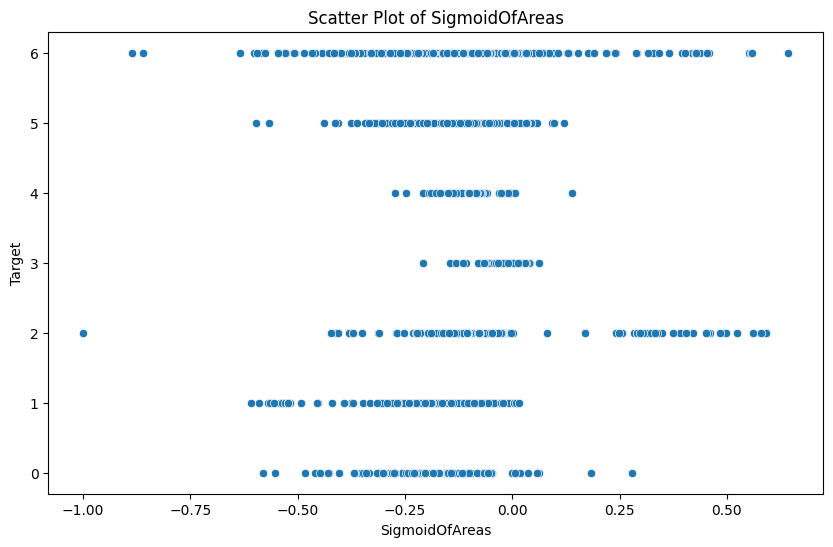

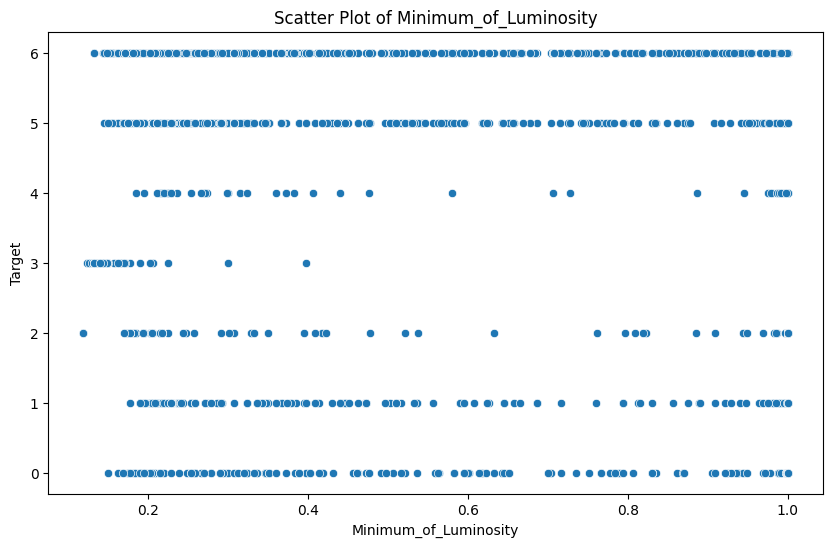

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for i in data.columns:
    if i != 'Target':  # Skip the 'Target' column itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=i, y='Target')
        plt.title(f"Scatter Plot of {i}")
        plt.xlabel(i)
        plt.ylabel('Target')
        plt.show()


In [ ]:
data[data['Pixels_Areas']>140000]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [ ]:
data[data['X_Perimeter']>8000]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [ ]:
data[data['Y_Perimeter']>15000]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [ ]:
data[data['Sum_of_Lumisity']> 1e7]


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [ ]:
data[data['Orientation_Index']>4]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [ ]:
data.drop(index=391, inplace=True)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.drop(columns=['index'], inplace=True)

In [ ]:
data.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Lumisity          0
Maximum_of_Lumisity      0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Lumisity_Index           0
SigmoidOfAreas           0
Minimum_of_Luminosity    0
Target                   0
dtype: int64

# Identifying that distribution of data for Train and Test dataset is approx. identical or not.

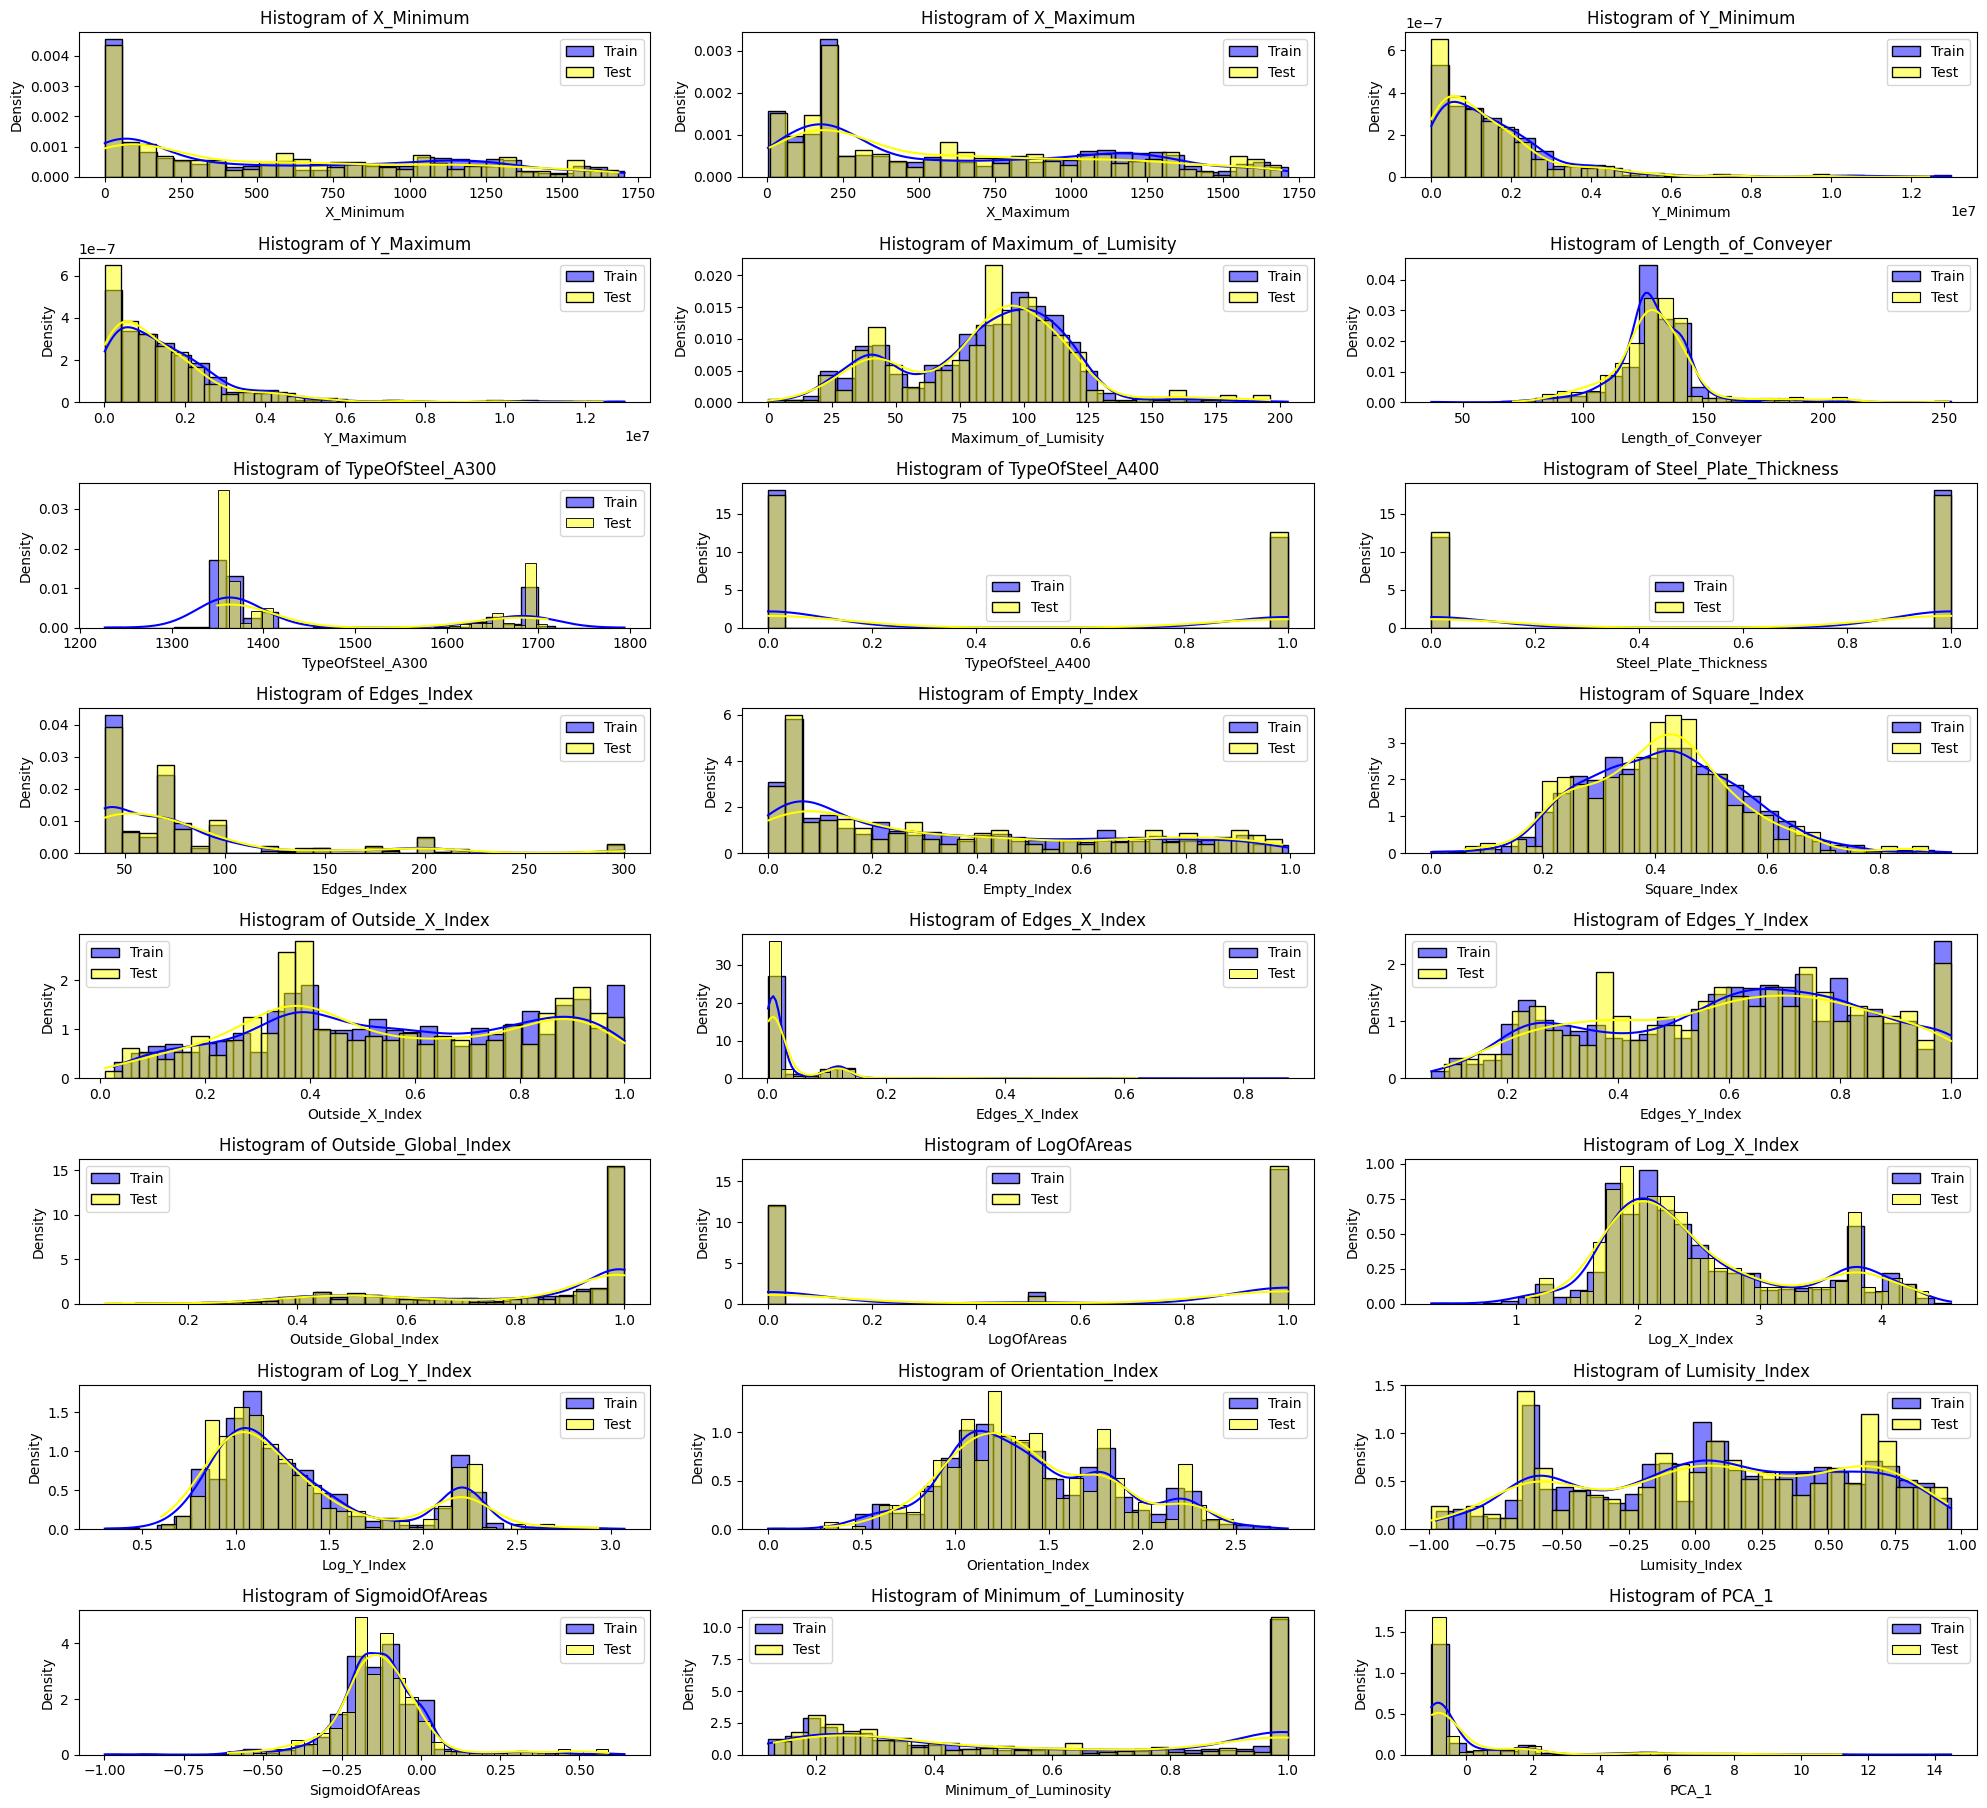

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

for idx, column in enumerate(x_train.columns):
    plt.subplot(9, 3, idx+1)
    sns.histplot(x_train[column], color="blue", kde=True, stat="density", label='Train', bins=30)
    sns.histplot(x_test[column], color="yellow", kde=True, stat="density", label='Test', bins=30)
    plt.title(f"Histogram of {column}")
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1940 non-null   int64  
 1   X_Maximum              1940 non-null   int64  
 2   Y_Minimum              1940 non-null   int64  
 3   Y_Maximum              1940 non-null   int64  
 4   Pixels_Areas           1940 non-null   int64  
 5   X_Perimeter            1940 non-null   int64  
 6   Y_Perimeter            1940 non-null   int64  
 7   Sum_of_Lumisity        1940 non-null   int64  
 8   Maximum_of_Lumisity    1940 non-null   int64  
 9   Length_of_Conveyer     1940 non-null   int64  
 10  TypeOfSteel_A300       1940 non-null   int64  
 11  TypeOfSteel_A400       1940 non-null   int64  
 12  Steel_Plate_Thickness  1940 non-null   int64  
 13  Edges_Index            1940 non-null   int64  
 14  Empty_Index            1940 non-null   float64
 15  Squa

In [ ]:
data['Target'] = data['Target'].astype('int')

In [ ]:
data.select_dtypes(include=['int64','float64']).corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
X_Minimum,1.000000,0.988314,0.042641,0.042632,-0.389060,-0.383422,-0.350872,-0.378765,0.236690,-0.074858,...,0.153721,0.368508,0.147835,-0.428098,-0.437460,-0.326854,0.179782,-0.032629,-0.354823,0.291431
X_Maximum,0.988314,1.000000,0.052854,0.052847,-0.282825,-0.271949,-0.258484,-0.274252,0.167760,-0.061792,...,0.148380,0.272385,0.099703,-0.331648,-0.323522,-0.265843,0.115986,-0.039901,-0.286338,0.269152
Y_Minimum,0.042641,0.052854,1.000000,1.000000,-0.005237,-0.002490,-0.026472,-0.010532,-0.063903,-0.068878,...,0.068040,-0.037156,-0.063609,0.042577,0.069206,-0.013236,-0.087961,-0.089409,0.024375,0.000742
Y_Maximum,0.042632,0.052847,1.000000,1.000000,-0.005214,-0.002466,-0.026443,-0.010509,-0.063920,-0.068876,...,0.068020,-0.037167,-0.063604,0.042602,0.069223,-0.013209,-0.087954,-0.089413,0.024396,0.000733
Pixels_Areas,-0.389060,-0.282825,-0.005237,-0.005214,1.000000,0.959504,0.929943,0.996767,-0.611971,0.119254,...,-0.344683,-0.634858,-0.164073,0.801896,0.770598,0.652498,-0.220294,-0.020830,0.540271,-0.301975
X_Perimeter,-0.383422,-0.271949,-0.002490,-0.002466,0.959504,1.000000,0.952089,0.960622,-0.565771,0.138803,...,-0.399090,-0.680242,-0.151129,0.804662,0.788775,0.664737,-0.213778,0.000255,0.573168,-0.279977
Y_Perimeter,-0.350872,-0.258484,-0.026472,-0.026443,0.929943,0.952089,1.000000,0.932100,-0.574470,0.116166,...,-0.520499,-0.565447,-0.021217,0.807914,0.699083,0.767673,-0.030292,-0.026864,0.606035,-0.284334
Sum_of_Lumisity,-0.378765,-0.274252,-0.010532,-0.010509,0.996767,0.960622,0.932100,1.000000,-0.592291,0.139871,...,-0.347630,-0.624268,-0.151972,0.781953,0.750894,0.639893,-0.207834,0.008299,0.521748,-0.295573
Maximum_of_Lumisity,0.236690,0.167760,-0.063903,-0.063920,-0.611971,-0.565771,-0.574470,-0.592291,1.000000,0.432463,...,0.249763,0.318307,0.036728,-0.677375,-0.566744,-0.586724,0.059741,0.668807,-0.514256,0.289279
Length_of_Conveyer,-0.074858,-0.061792,-0.068878,-0.068876,0.119254,0.138803,0.116166,0.139871,0.432463,1.000000,...,0.095462,-0.168116,-0.124751,0.005261,0.091697,-0.074800,-0.171268,0.872680,-0.040556,0.019399


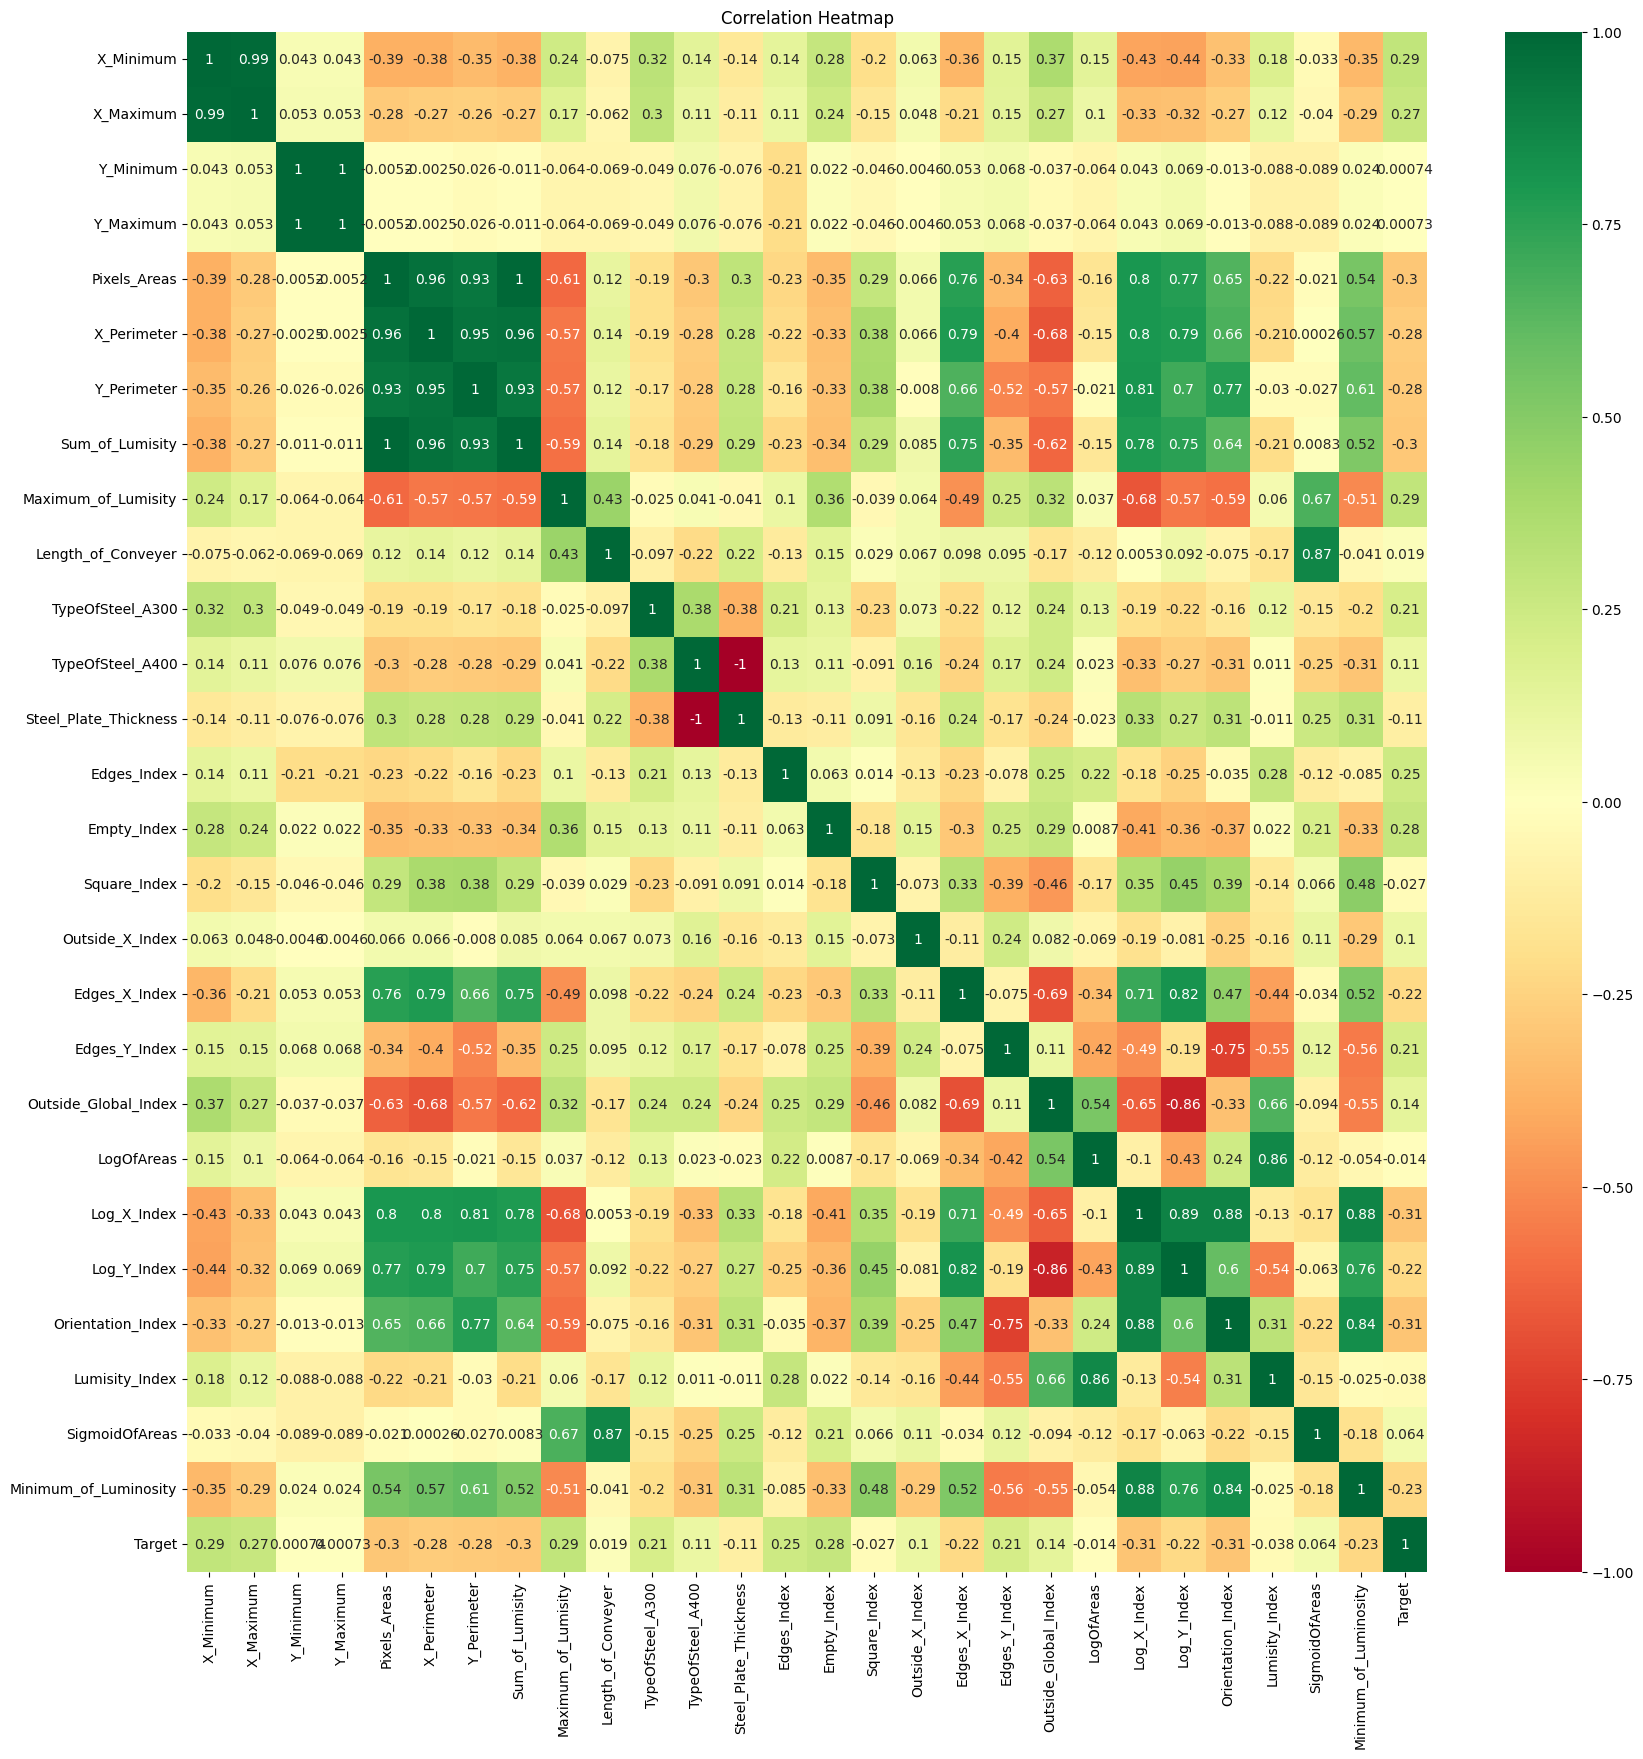

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

corr_mat = data.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data_new = data.copy()

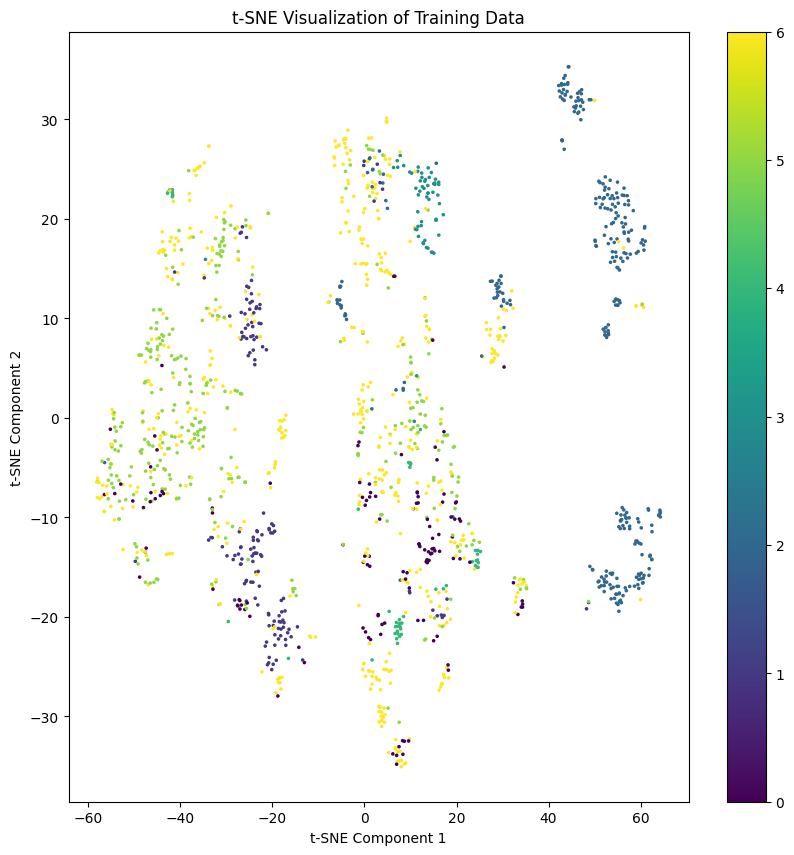

In [ ]:
X = data_new.drop(columns=['Target'])
y = data_new['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply t-SNE
tsne = TSNE(random_state=123)
tsne_mat = tsne.fit_transform(X_train)

# Plot t-SNE result
plt.figure(figsize=(10,10))
plt.scatter(tsne_mat[:,0], tsne_mat[:,1], c=y_train.values.flatten().astype('int'), s=2.5, cmap='viridis')
plt.colorbar()
plt.title("t-SNE Visualization of Training Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


# We try to retain columns as much as we can so we only use PCA with those columns that have high multicollinearity

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns
selected_columns = ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Lumisity', 'Target']

# Extracting data and target
X = data_new[selected_columns].drop(columns=['Target'])
y = data_new['Target']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=4)  # Specify the number of principal components to retain
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for PCA results
columns_pca = [f"PCA_{i+1}" for i in range(pca.n_components_)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

# Concatenating PCA components with target
df_pca['Target'] = y.reset_index(drop=True)

# Explained variance ratio of the first principal component
explained_variance_ratio_pca1 = pca.explained_variance_ratio_[0]
print(f"Explained variance ratio of PCA1: {explained_variance_ratio_pca1:.2f}")

# Total explained variance by all selected principal components
total_explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total explained variance by all components: {total_explained_variance:.2f}")


Explained variance ratio of PCA1: 0.97
Total explained variance by all components: 1.00


In [ ]:
print(len(df_pca.iloc[:,0]))
print(len(data_new))

1940
1940


In [ ]:
data_new.drop(columns=['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Lumisity'], inplace=True)
data_new = pd.concat([data_new,df_pca.iloc[:,0]], axis=1)

In [ ]:
data_new.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Maximum_of_Lumisity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'Target', 'PCA_1'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Assuming 'data_new' is your DataFrame and 'columns' contains your feature names
X = data_new.drop(columns=['Target'])
y = data_new['Target']
columns = X.columns

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize SelectKBest with the desired score function (e.g., f_classif for classification)
# Ensure that k is within the range of available columns
k_best = SelectKBest(score_func=f_classif, k=16)

# Fit SelectKBest to data
X_new = k_best.fit_transform(X, y)

# Get selected feature indices
selected_indices = k_best.get_support(indices=True)

# Print selected feature names
selected_features = [columns[i] for i in selected_indices]
print("Selected features:")
for i in selected_features:
  print(i)


Selected features:
X_Minimum
X_Maximum
Maximum_of_Lumisity
TypeOfSteel_A300
TypeOfSteel_A400
Steel_Plate_Thickness
Edges_Index
Empty_Index
Edges_X_Index
Outside_Global_Index
Log_X_Index
Log_Y_Index
Orientation_Index
Lumisity_Index
Minimum_of_Luminosity
PCA_1


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_new.drop(columns=['Target'])
y = data_new['Target']
columns = X.columns

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Initialize RFE with estimator and number of features to select
estimator = LogisticRegression(max_iter=2000)
rfe = RFE(estimator, n_features_to_select=16, step=1)

# Fit RFE to data
X_rfe = rfe.fit_transform(X, y)

# Get selected feature indices
selected_indices_rfe = rfe.get_support(indices=True)

# Print selected feature names
selected_features_rfe = [columns[i] for i in selected_indices_rfe]
print("Selected features with RFE- Logistic Regression:")
for i in selected_features_rfe:
  print(i)

Selected features with RFE- Logistic Regression:
X_Minimum
Maximum_of_Lumisity
Length_of_Conveyer
TypeOfSteel_A300
TypeOfSteel_A400
Steel_Plate_Thickness
Edges_Index
Square_Index
Outside_X_Index
Edges_Y_Index
Outside_Global_Index
Log_X_Index
Log_Y_Index
Orientation_Index
Lumisity_Index
Minimum_of_Luminosity


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# Initialize Random Forest classifier
rf_estimator = RandomForestClassifier(random_state=42)

# Initialize RFE with Random Forest as estimator and number of features to select
rfe_rf = RFE(estimator=rf_estimator, n_features_to_select=16, step=8)  # Select top 2 features

# Fit RFE with Random Forest to data
X_rfe_rf = rfe_rf.fit_transform(X, y)

# Get selected feature indices
selected_indices_rf = rfe_rf.get_support(indices=True)

# Print selected feature names
selected_features_rf = [columns[i] for i in selected_indices_rf]
print("Selected features with RFE- Random Forest:")
for i in selected_features_rf:
  print(i)

Selected features with RFE- Random Forest:
X_Minimum
X_Maximum
Y_Maximum
Maximum_of_Lumisity
TypeOfSteel_A300
Edges_Index
Empty_Index
Edges_X_Index
Outside_Global_Index
Log_X_Index
Log_Y_Index
Orientation_Index
Lumisity_Index
SigmoidOfAreas
Minimum_of_Luminosity
PCA_1


In [ ]:
data_new.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Maximum_of_Lumisity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'Target', 'PCA_1'],
      dtype='object')

In [ ]:
X, Y = data_new.drop(columns=['Target']), data.Target

In [ ]:
Y.value_counts()

Target
6    673
5    402
2    390
1    190
0    158
3     72
4     55
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=142)

# Oversampling is a solution but one other possibility is Random Forest or ensemble boosting methods which can handle imbalanced data very well.

# Trying to avoid SMOTE as SMOTE can lead to overfitting or introduction of noise.
# SMOTE stands for Synthetic Minority Oversampling Technique

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, cohen_kappa_score

# Taking all 24 Features

In [ ]:
# Features and target column names
columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Maximum_of_Lumisity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'PCA_1']

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'R_squared', 'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'R_squared': [r_squared], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

                 Model  Accuracy  R_squared  Cohen Kappa
0  Logistic Regression  0.737113   0.242036     0.660000
1  K-Nearest Neighbors  0.729381   0.208483     0.654010
2          Naive Bayes  0.649485  -0.200751     0.571455
3        Decision Tree  0.747423   0.378998     0.672929
4        Random Forest  0.793814   0.415301     0.730343
5             AdaBoost  0.561856  -0.341563     0.343799
6              XGBoost  0.783505   0.480756     0.718610
7    Gradient Boosting  0.798969   0.458754     0.737565
8                  SVM  0.752577   0.288790     0.676366


# Taking Features as per Correlation coefficient table output
## Taking 14 best features (inclusive of PCA_1)

In [ ]:
# Features and target column names
columns = ["Edges_Index","Edges_X_Index","Edges_Y_Index","Empty_Index","Lumisity_Index",
"Maximum_of_Lumisity","Minimum_of_Luminosity","Orientation_Index","Outside_Global_Index",
"Outside_X_Index","PCA_1","TypeOfSteel_A300","TypeOfSteel_A400","X_Minimum"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'R_squared', 'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'R_squared': [r_squared], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

                 Model  Accuracy  R_squared  Cohen Kappa
0  Logistic Regression  0.726804   0.191432     0.644255
1  K-Nearest Neighbors  0.693299   0.123226     0.611219
2          Naive Bayes  0.613402  -0.264007     0.530118
3        Decision Tree  0.719072   0.225535     0.637824
4        Random Forest  0.770619   0.405950     0.699225
5             AdaBoost  0.533505  -0.384467     0.321324
6              XGBoost  0.775773   0.386148     0.707920
7    Gradient Boosting  0.783505   0.444453     0.717253
8                  SVM  0.729381   0.158979     0.646734


# Taking features as per K-Best
## Taking best 16 features

In [ ]:
# Features and target column names
columns = ['X_Minimum', 'X_Maximum', 'Maximum_of_Lumisity', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Edges_X_Index', 'Outside_Global_Index', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index',
       'Minimum_of_Luminosity', 'PCA_1']

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'R_squared', 'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'R_squared': [r_squared], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

                 Model  Accuracy  R_squared  Cohen Kappa
0  Logistic Regression  0.685567   0.170530     0.589204
1  K-Nearest Neighbors  0.706186   0.110025     0.625314
2          Naive Bayes  0.610825  -0.288209     0.530391
3        Decision Tree  0.711340   0.286590     0.630749
4        Random Forest  0.775773   0.425201     0.704336
5             AdaBoost  0.515464  -0.587434     0.330697
6              XGBoost  0.793814   0.507158     0.731648
7    Gradient Boosting  0.791237   0.417501     0.727597
8                  SVM  0.719072   0.158429     0.629875


# Taking features as per Recurrsive feature selection using Random Forest

In [ ]:
# Features and target column names
columns = ["X_Minimum", "X_Maximum", "Y_Maximum", "Maximum_of_Lumisity", "TypeOfSteel_A300", "Edges_Index",
"Empty_Index", "Edges_X_Index", "Outside_Global_Index", "Log_X_Index", "Log_Y_Index",
"Orientation_Index", "Lumisity_Index", "SigmoidOfAreas", "Minimum_of_Luminosity", "PCA_1"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'R_squared', 'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'R_squared': [r_squared], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

                 Model  Accuracy  R_squared  Cohen Kappa
0  Logistic Regression  0.685567   0.191432     0.589589
1  K-Nearest Neighbors  0.716495   0.118826     0.638287
2          Naive Bayes  0.610825  -0.343763     0.527638
3        Decision Tree  0.731959   0.227735     0.652868
4        Random Forest  0.762887   0.434002     0.690946
5             AdaBoost  0.518041  -0.572033     0.339758
6              XGBoost  0.791237   0.434002     0.727797
7    Gradient Boosting  0.783505   0.510459     0.717527
8                  SVM  0.713918   0.229385     0.628490


# Finalizing features

In [ ]:
# Features and target column names
columns = ["Edges_Index", "Edges_X_Index", "Empty_Index", "Log_X_Index", "Lumisity_Index",
"Maximum_of_Lumisity", "Minimum_of_Luminosity", "Orientation_Index", "Outside_Global_Index",
"Outside_X_Index", "PCA_1", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Minimum", "SigmoidOfAreas"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'R_squared', 'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'R_squared': [r_squared], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

                 Model  Accuracy  R_squared  Cohen Kappa
0  Logistic Regression  0.737113   0.291540     0.658283
1  K-Nearest Neighbors  0.711340   0.044019     0.632899
2          Naive Bayes  0.631443  -0.145747     0.549434
3        Decision Tree  0.729381   0.257437     0.652356
4        Random Forest  0.791237   0.442253     0.724697
5             AdaBoost  0.546392  -0.440022     0.331427
6              XGBoost  0.786082   0.522010     0.722501
7    Gradient Boosting  0.791237   0.463155     0.727738
8                  SVM  0.737113   0.190332     0.655992


In [ ]:
!pip install optuna
import optuna
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


# Assuming 'data_new' is your DataFrame with features and target
X = data_new.drop(columns=['Target'])
y = data_new['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for XGBoost
def objective_xgb(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1)
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define the objective function for Gradient Boosting
def objective_gbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    }

    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optimize for XGBoost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Optimize for Gradient Boosting
study_gbm = optuna.create_study(direction='maximize')
study_gbm.optimize(objective_gbm, n_trials=50)

# Print model names and best hyperparameters
print("Model: XGBoost")
print("Best Hyperparameters: ", study_xgb.best_params)
print("\nModel: Gradient Boosting")
print("Best Hyperparameters: ", study_gbm.best_params)


In [ ]:
print("Model: XGBoost")
print("Best Hyperparameters: ", study_xgb.best_params)
print("\nModel: Gradient Boosting")
print("Best Hyperparameters: ", study_gbm.best_params)

Model: XGBoost
Best Hyperparameters:  {'n_estimators': 139, 'max_depth': 5, 'learning_rate': 0.18750236072236565, 'gamma': 0.9410509049830169, 'min_child_weight': 6, 'subsample': 0.9893260505598702, 'colsample_bytree': 0.5735729861432622}

Model: Gradient Boosting
Best Hyperparameters:  {'n_estimators': 76, 'max_depth': 6, 'learning_rate': 0.029513340651416226, 'min_samples_split': 10, 'min_samples_leaf': 8, 'subsample': 0.8354613832377752, 'max_features': None}


In [ ]:
columns = ["Edges_Index", "Edges_X_Index", "Empty_Index", "Log_X_Index", "Lumisity_Index",
"Maximum_of_Lumisity", "Minimum_of_Luminosity", "Orientation_Index", "Outside_Global_Index",
"Outside_X_Index", "PCA_1", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Minimum", "SigmoidOfAreas"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost with specified hyperparameters
xgb_params = {
    'n_estimators': 139,
    'max_depth': 3,
    'learning_rate': 0.18750236072236565,
    'gamma': 0.9410509049830169,
    'min_child_weight': 6,
    'subsample': 0.9893260505598702,
    'colsample_bytree': 0.5735729861432622,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

xgb_model = xgb.XGBClassifier(**xgb_params)

# Define Gradient Boosting with specified hyperparameters
gbm_params = {
    'n_estimators': 76,
    'max_depth': 5,
    'learning_rate': 0.029513340651416226,
    'min_samples_split': 10,
    'min_samples_leaf': 8,
    'subsample': 0.8354613832377752,
    'max_features': None
}

gbm_model = GradientBoostingClassifier(**gbm_params)

# List of models to train and evaluate
models = {
    'XGBoost': xgb_model,
    'Gradient Boosting': gbm_model
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)


               Model  Accuracy  Cohen Kappa
0            XGBoost  0.773196     0.705152
1  Gradient Boosting  0.791237     0.726392


# -----------------------------------------------------------
# -----------------------------------------------------------
